In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
plt.figure(figsize=(35,20))

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

In [20]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from tensorflow import keras

In [22]:
# from Keras. utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [23]:
stock_data = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv',index_col ='Date')

In [24]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,36.259998,37.130001,34.130001,37.009998,37.009998,1933600
2021-08-26,36.799999,36.845001,35.200001,36.279999,36.279999,1760100
2021-08-27,36.930000,39.720001,35.924999,39.450001,39.450001,3693800
2021-08-30,39.689999,42.180000,39.520000,41.849998,41.849998,2105900
2021-08-31,41.430000,41.930000,40.061001,41.009998,41.009998,1418400
...,...,...,...,...,...,...
2022-08-19,11.640000,11.770000,10.690000,10.800000,10.800000,3400300
2022-08-22,10.500000,10.640000,9.960000,10.160000,10.160000,3156500
2022-08-23,10.210000,10.500000,10.060000,10.100000,10.100000,2587800


Check for Null Values by printing the DataFrame Shape

In [25]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", stock_data. shape)
print("Null Value Present: ", stock_data.isnull().values.any())


Dataframe Shape:  (253, 6)
Null Value Present:  False


The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model

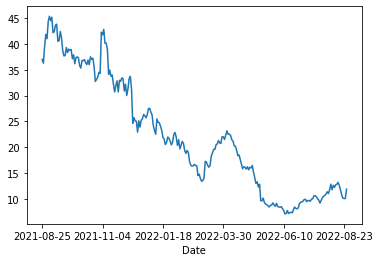

In [26]:
#Plot the True Adj Close Value
stock_data['Adj Close'].plot()

In [27]:
#Set Target Variable
output_var = pd.DataFrame(stock_data['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

Scaling

In [28]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stock_data.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2021-08-25,0.766763,0.721967,0.735703,0.058120
2021-08-26,0.780962,0.715077,0.764649,0.050145
2021-08-27,0.784381,0.784585,0.784261,0.139038
2021-08-30,0.856955,0.844060,0.881513,0.066041
2021-08-31,0.902708,0.838016,0.896148,0.034436


Creating a Training Set and a Test Set for Stock Market Prediction

In [29]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match into the format (Number of Samples, 1, Number of Features). 

In [30]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination. The model is plotted and presented below.

In [31]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
# plt.show(lstm, show_shapes=True, show_layer_names=True)

In [32]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
29/29 [==============================] - 2s 4ms/step - loss: 660.6898
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 656.4012
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 651.1219
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 643.9958
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 634.5557
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 622.2807
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 606.7240
Epoch 8/100
29/29 [==============================] - 0s 5ms/step - loss: 587.5313
Epoch 9/100
29/29 [==============================] - 0s 5ms/step - loss: 564.4932
Epoch 10/100
29/29 [==============================] - 0s 6ms/step - loss: 537.5859
Epoch 11/100
29/29 [==============================] - 0s 5ms/step - loss: 506.9925
Epoch 12/100
29/29 [==============================] - 0s 7ms/step - loss: 473.1048
Epoch 13/100


In [33]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

Comparing Predicted vs True Adjusted Close Value – LSTM

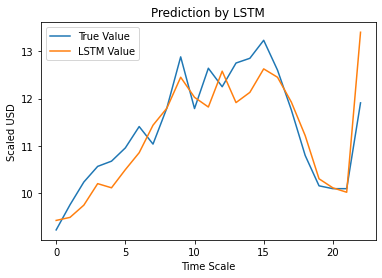

In [34]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()